In [1]:
import pandas as pd
import numpy as np
import datetime 

In [2]:
df=pd.read_csv(r"C:\Users\Admin\OneDrive - Unimore\Desktop\erasmus_subjects\data_visualization\project\TIME SERIES\AirQualityUCI.csv", sep=';',decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
#elimino i valori nulli
df=df[df['Date'].notnull()]

In [4]:
df['DateTime'] = (df.Date) + ' ' + (df.Time)
print (type(df.DateTime[0]))


<class 'str'>


In [5]:
df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x,
'%d/%m/%Y %H.%M.%S'))
print (type(df.DateTime[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [8]:
df.index=df.DateTime

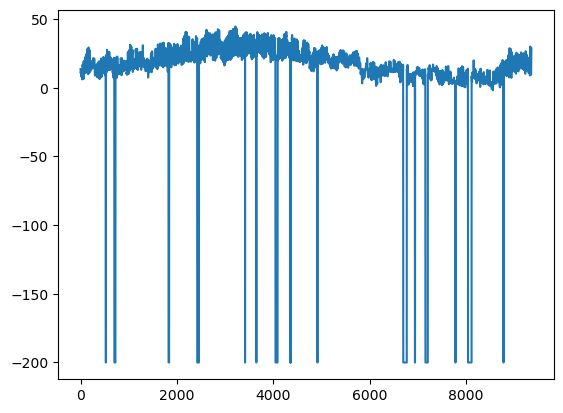

In [6]:
import matplotlib.pyplot as plt
plt.plot(df['T'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2523dafa450>,
 'caps': [<matplotlib.lines.Line2D at 0x2523dafbe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2523daed2d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2523db01610>,
 'fliers': [<matplotlib.lines.Line2D at 0x2523db01f50>,
 'means': []}

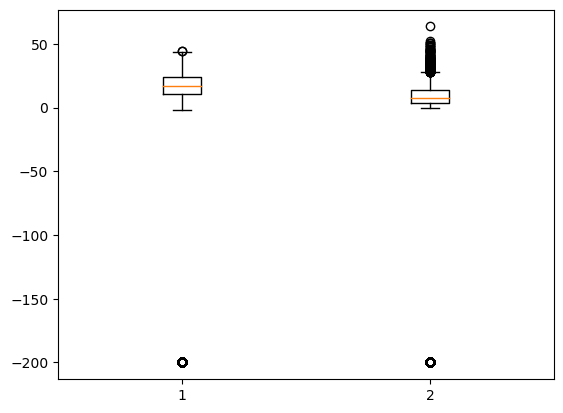

In [7]:
plt.boxplot(df[['T','C6H6(GT)']].values)

In [9]:
#NAIVE METHOD 1
#cerco i vlaori cruciali
print('Mean:',np.mean(df['T']),';std:',np.std(df['T']),'\nMaximum Temperature:',np.max(df['T']),';Min Temperature:',np.min(df['T']))

Mean: 9.778305012290264 ;std: 43.20131437514648 
Maximum Temperature: 44.6 ;Min Temperature: -200.0


In [10]:
#traslo i valori di un periodo indietro e poi valuto la perfonrmance di predizione con il ROOT MEAN SQUARED ERROR
df['T_t-1']=df['T'].shift(1)
df_naive=df[['T','T_t-1']][1:]

In [16]:
from sklearn import metrics
import math
true=df_naive['T']

In [18]:
prediction=df_naive['T_t-1']
error=sqrt(metrics.mean_squared_error(true,prediction))
print('RMSE for naive method 1:', error)

RMSE for naive method 1: 12.901140576492974


In [ ]:
#NAIVE METHOD 2